# Example 8: RVT SRA with simulated profiles

Use RVT with simulated profiles to compute the surface response spectrum and surface spectral ratio.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pysra

%matplotlib inline

In [2]:
# Increased figure sizes
plt.rcParams['figure.dpi'] = 120

## Create a point source theory RVT motion

In [3]:
m = pysra.motion.SourceTheoryRvtMotion(6.0, 30, 'wna')
m.calc_fourier_amps()

## Create site profile

This is about the simplest profile that we can create. Linear-elastic soil and rock.

In [4]:
profile = pysra.site.Profile([
    pysra.site.Layer(
        pysra.site.DarendeliSoilType(
            18., plas_index=0, ocr=1, stress_mean=100), 10, 400),
    pysra.site.Layer(
        pysra.site.DarendeliSoilType(
            18., plas_index=0, ocr=1, stress_mean=200), 10, 450),
    pysra.site.Layer(
        pysra.site.DarendeliSoilType(
            18., plas_index=0, ocr=1, stress_mean=400), 30, 600),
    pysra.site.Layer(
        pysra.site.SoilType('Rock', 24., None, 0.01), 0, 1200),
])

## Create the site response calculator

In [5]:
calc = pysra.propagation.EquivalentLinearCalculator()

## Initialize the variations

In [6]:
var_thickness = pysra.variation.ToroThicknessVariation()
var_velocity = pysra.variation.ToroVelocityVariation.generic_model(
    'USGS C')
var_soiltypes = pysra.variation.SpidVariation(
    -0.5, std_mod_reduc=0.15, std_damping=0.30)

## Specify the output

In [7]:
freqs = np.logspace(-1, 2, num=500)

outputs = pysra.output.OutputCollection([
    pysra.output.ResponseSpectrumOutput(
        # Frequency
        freqs,
        # Location of the output
        pysra.output.OutputLocation('outcrop', index=0),
        # Damping
        0.05),
    pysra.output.ResponseSpectrumRatioOutput(
        # Frequency
        freqs,
        # Location in (denominator),
        pysra.output.OutputLocation('outcrop', index=-1),
        # Location out (numerator)
        pysra.output.OutputLocation('outcrop', index=0),
        # Damping
        0.05),
    pysra.output.InitialVelProfile(),
])

## Perform the calculation

In [8]:
count = 20
for p in pysra.variation.iter_varied_profiles(
        profile,
        count,
        var_thickness=var_thickness,
        var_velocity=var_velocity,
        var_soiltypes=var_soiltypes
):
    # Here we auto-descretize the profile for wave propagation purposes
    calc(m, p.auto_discretize(), p.location('outcrop', index=-1))
    outputs(calc)

## Plot the outputs

Create a few plots of the output.

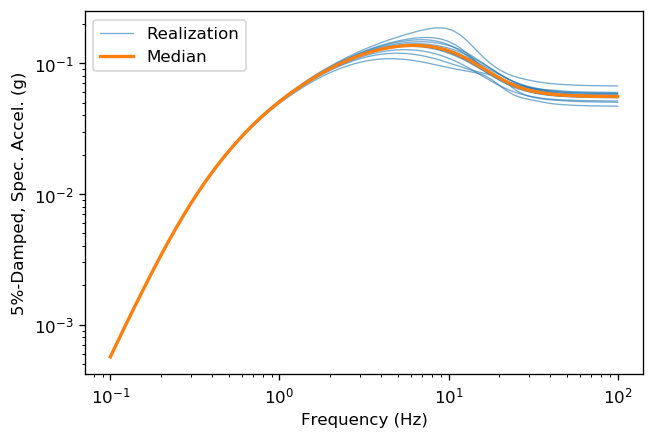

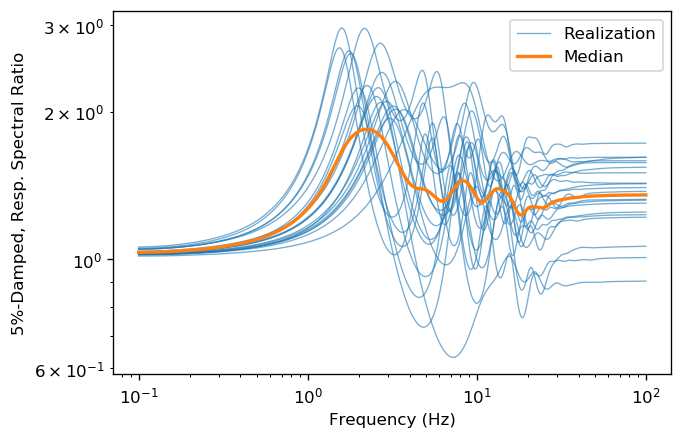

In [9]:
for o in outputs[:-1]:
    ax = o.plot(style='stats')

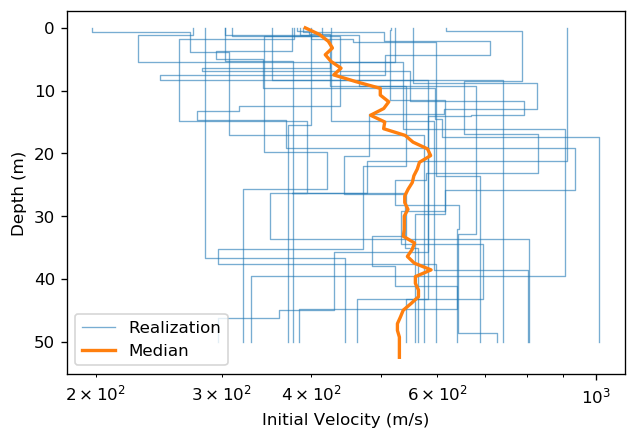

In [10]:
ax = outputs[-1].plot(style='stats')

The statistics of the output can be also retrieved and returned as either a `dict` or `pandas.DataFrame`.

In [11]:
outputs[-1].calc_stats()

{'ref': array([ 0.        ,  1.07142857,  2.14285714,  3.21428571,  4.28571429,
         5.35714286,  6.42857143,  7.5       ,  8.57142857,  9.64285714,
        10.71428571, 11.78571429, 12.85714286, 13.92857143, 15.        ,
        16.07142857, 17.14285714, 18.21428571, 19.28571429, 20.35714286,
        21.42857143, 22.5       , 23.57142857, 24.64285714, 25.71428571,
        26.78571429, 27.85714286, 28.92857143, 30.        , 31.07142857,
        32.14285714, 33.21428571, 34.28571429, 35.35714286, 36.42857143,
        37.5       , 38.57142857, 39.64285714, 40.71428571, 41.78571429,
        42.85714286, 43.92857143, 45.        , 46.07142857, 47.14285714,
        48.21428571, 49.28571429, 50.35714286, 51.42857143, 52.5       ]),
 'median': array([392.54469715, 411.07573575, 422.6980981 , 428.35393727,
        418.58779126, 426.46349885, 440.36633081, 430.18854432,
        461.81186849, 499.60095627, 499.60095627, 513.41889172,
        505.17651279, 484.19662161, 506.85291852, 505.00000

In [12]:
outputs[-1].calc_stats(as_dataframe=True)

,median,ln_std
depth,,
0.000000,392.544697,0.324930
1.071429,411.075736,0.322788
2.142857,422.698098,0.359572
3.214286,428.353937,0.367115
4.285714,418.587791,0.352265
5.357143,426.463499,0.338904
6.428571,440.366331,0.308512
7.500000,430.188544,0.336262
8.571429,461.811868,0.316724


## Repeat using a Generic Depth-Dependent Model

The generic `DepthDependToroVelVariation` follows the SPID guidance.

In [13]:
var_velocity_dd = pysra.variation\
    .DepthDependToroVelVariation.generic_model('USGS C')

In [14]:
outputs.reset()
count = 20
for p in pysra.variation.iter_varied_profiles(
        profile,
        count,
        var_thickness=var_thickness,
        var_velocity=var_velocity_dd,
        var_soiltypes=var_soiltypes
):
    calc(m, p.auto_discretize(), p.location('outcrop', index=-1))
    outputs(calc)

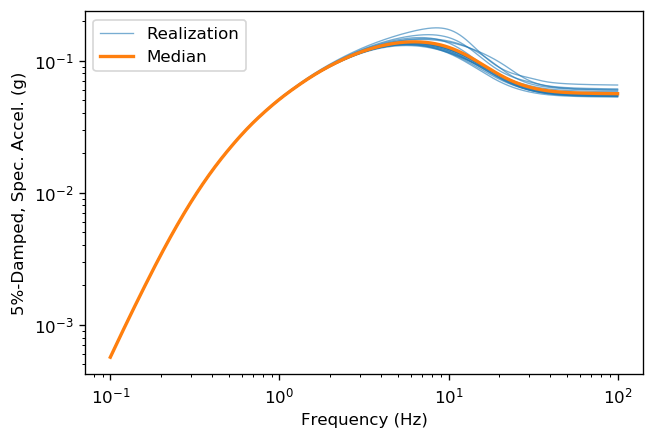

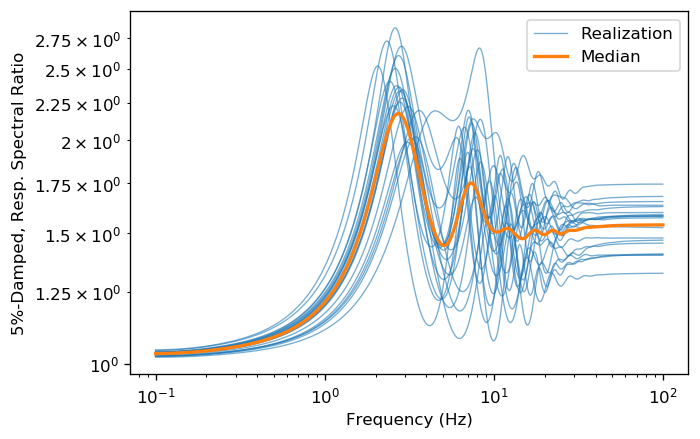

In [15]:
for o in outputs[:-1]:
    ax = o.plot(style='stats')

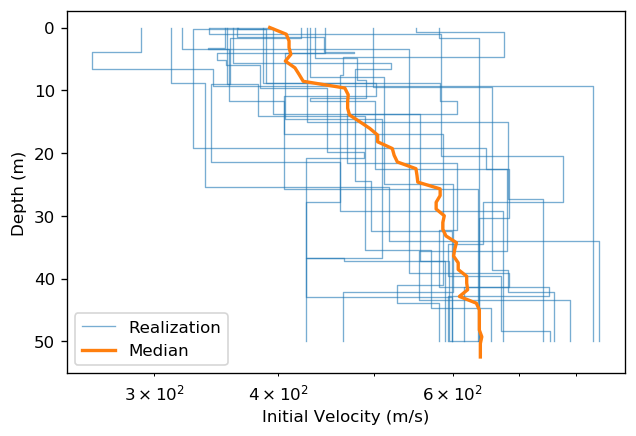

In [16]:
ax = outputs[-1].plot(style='stats')

In [17]:
outputs[-1].calc_stats(as_dataframe=True)

,median,ln_std
depth,,
0.000000,392.239706,0.178957
1.071429,407.637699,0.216566
2.142857,410.279641,0.225964
3.214286,410.279641,0.225964
4.285714,412.008556,0.238657
5.357143,406.773695,0.214285
6.428571,415.942370,0.216625
7.500000,420.070102,0.189725
8.571429,424.024267,0.195094


## Repeat using a Specific Depth-Dependent Model

In [18]:
var_velocity_dd = pysra.variation\
    .DepthDependToroVelVariation.generic_model(
    'USGS C',
    depth=[0, 10, 20],
    ln_std=[0.25, 0.15, 0.10]
)

In [19]:
outputs.reset()
count = 20
for p in pysra.variation.iter_varied_profiles(
        profile,
        count,
        var_thickness=var_thickness,
        var_velocity=var_velocity_dd,
        var_soiltypes=var_soiltypes
):
    calc(m, p.auto_discretize(), p.location('outcrop', index=-1))
    outputs(calc)

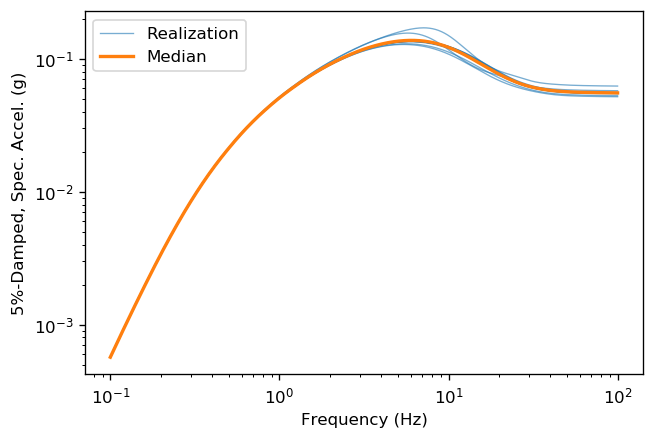

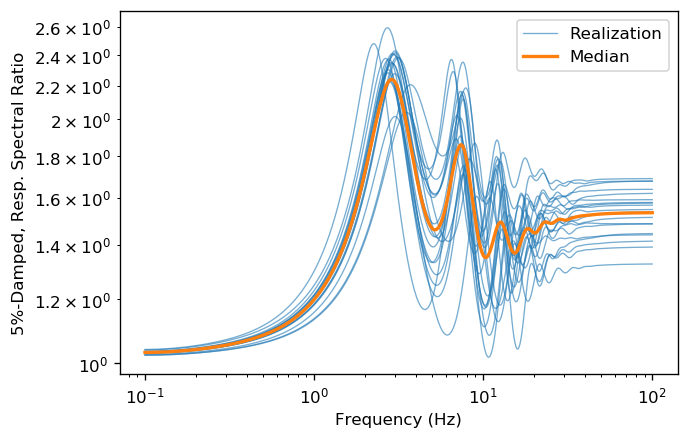

In [20]:
for o in outputs[:-1]:
    ax = o.plot(style='stats')

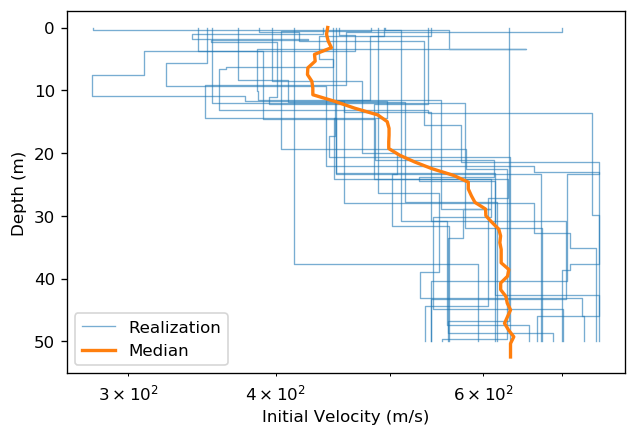

In [21]:
ax = outputs[-1].plot(style='stats')

In [22]:
outputs[-1].calc_stats(as_dataframe=True)

,median,ln_std
depth,,
0.000000,442.941081,0.212699
1.071429,441.953328,0.173962
2.142857,443.350036,0.169633
3.214286,446.185734,0.163208
4.285714,431.664265,0.167492
5.357143,432.263607,0.167678
6.428571,426.100158,0.177094
7.500000,425.787400,0.177782
8.571429,429.465785,0.186556
